 # Основы статистики
 Полезные ссылки:
 - https://vavilovva.shinyapps.io/dist_calc/ - визуализирует и рассчитывает p (p-value)
 - https://rpsychologist.com/correlation/ - визуализация корреляции
 - https://gallery.shinyapps.io/slr_diag/ - диагностика линейной регрессии

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

## Часть 1. Введение в статистику

### Меры центральной тенденции

Рассчет среднего, медианы и моды случайной выборки.
- с помощью библиотек numpy и stats:

In [4]:
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
                   167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

mode, count =  stats.mode(sample)
print('count:', count)
print('mode:', mode)
print('median:', np.median(sample))
print('mean:', np.mean(sample))

count: 4
mode: 172
median: 170.5
mean: 170.4


 - с помощью библиотеки pandas:

In [6]:
sample = pd.Series([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
                    167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

print('mode:', sample.mode())
print('median:', sample.median())
print('mean:', sample.mean())

mode: 0    172
dtype: int64
median: 170.5
mean: 170.4


### Меры изменчивости

Рассчет размаха и стандартного отклонения выборки.

In [7]:
sample = np.array([185, 175, 170, 169, 171, 175, 157, 172, 170, 172, 167, 173, 168, 167, 166,
                   167, 169, 172, 177, 178, 165, 161, 179, 159, 164, 178, 172, 170, 173, 171])

print(f'Размах: {np.ptp(sample)} проверка по разнице max-min: {np.max(sample)- np.min(sample)}')

print(f'Standard deviation: {np.std(sample, ddof=1):.2f}')

Размах: 28 проверка по разнице max-min: 28
Standard deviation: 6.00


Создание диаграммы boxplot по этим данным:

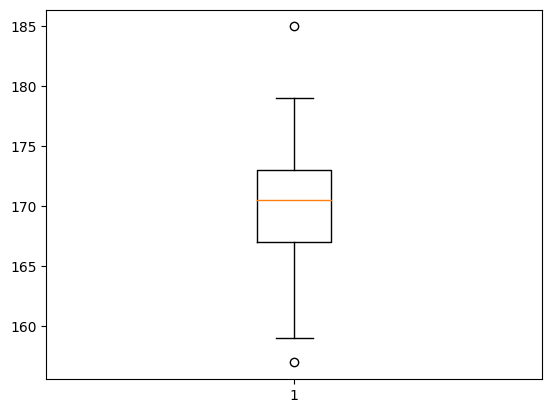

In [8]:
plt.boxplot(sample, showfliers=1)
plt.show()

По диаграмме boxplot мы можем узнать медиану выборки(выборок), размер 2 и 3 квартильи, существуют ли выбросы, которые выходят за их границы.

## Нормальное распределение

Иммитация доски Гальдота с помощью seaborn:

*при каждом новом запуске программы распределение будет немного меняться, но в итоге будет сильно приближенно  к нормальному (наиболее сильны различия при маленьких N).*

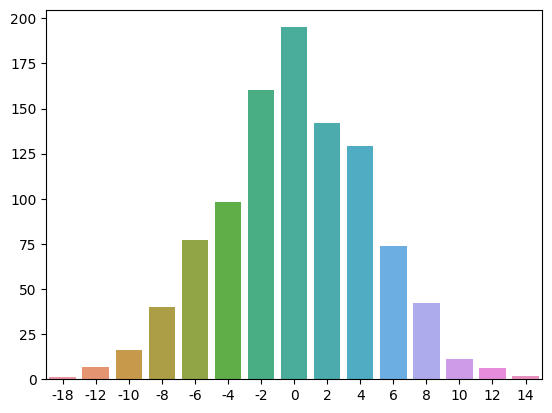

In [12]:
data = dict()
# количество шариков
N = 1000
# количество уровней
level = 20
for _ in range(N):
    index = 0
    for _ in range(level):
        index += np.random.choice([-1, 1])
    data.setdefault(index, 0)
    data[index] += 1
sns.barplot(x=list(data.keys()), y=list(data.values()));

Решение задачи:

**Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение
со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).
Какой приблизительно процент людей обладает IQ > 125?**

In [13]:
mean = 100
std = 15
IQ = 125
# sf - Survival function = (1 - cdf) - Cumulative distribution function
print(f"Только у {(stats.norm(mean, std).sf(IQ))*100:.2f}% людей, IQ>{IQ}")

Только у 4.78% людей, IQ>125


### Z-преобразование:

Решение задачи:

**Допустим, мы измерили рост 1000 человек, данное распределение оказалось нормальным со средним равным 175 и стандартным отклонением равным 8 (M = 175, sd = 8). Рост одного из испытуемых составил 186,2. Чему равняется z - значение, рассчитанное для этого испытуемого?**

In [22]:
N = 1000
M = 175
sd = 8

h = 186.2

print('Z-значение будет равно', '{0:.2f}'.format((h-M)/sd))

Z-значение будет равно 1.40


Решение задачи:

Считается, что значение IQ (уровень интеллекта) у людей имеет нормальное распределение со средним значением равным 100 и стандартным отклонением равным 15 (M = 100, sd = 15).

**Какой приблизительно процент людей обладает IQ  на промежутке от 70 до 112?**

In [24]:
M = 100
sd = 15

z1 = (112-100)/sd
z2 = (70-100)/sd

print(f'На промежутке [-2σ ; 0,8σ] расположено {(stats.norm.cdf(z1) - stats.norm.cdf(z2)):.2%} значений')
                                                # показывает сколько значений в заданном промежутке

На промежутке [-2σ ; 0,8σ] расположено 76.54% значений


### Центральная предельная теорема

Гласит, что множество средних выборок из генеральной совокупности (ГС необязательно иметь нормальное распределние) будут иметь нормальное распределение. Причём средняя этого распределения будет близко к средней генеральной совокупности, а стандарное отклонение этого распределение будет називаться **стандарной ошибкой среднего** (se).

Пример реализации теоремы:

<Axes: ylabel='Frequency'>

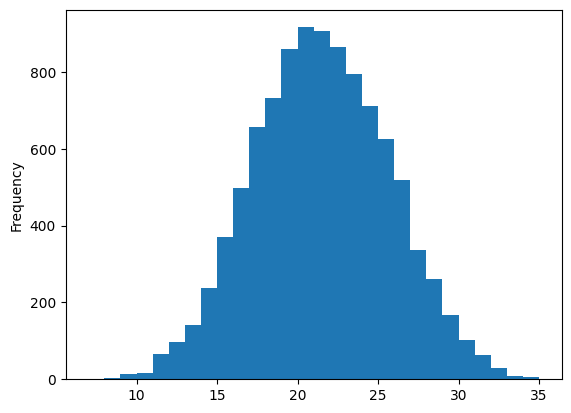

In [25]:
# значения игральной кости
dice = [1, 2, 3, 4, 5, 6]
# количество бросков кости
count = 6
# размер генеральной совокупность
sp_size = 10000
# sp - Statistical population - генеральная совокупность
sp = pd.Series(dtype=np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value

sp.plot.hist(bins=28)

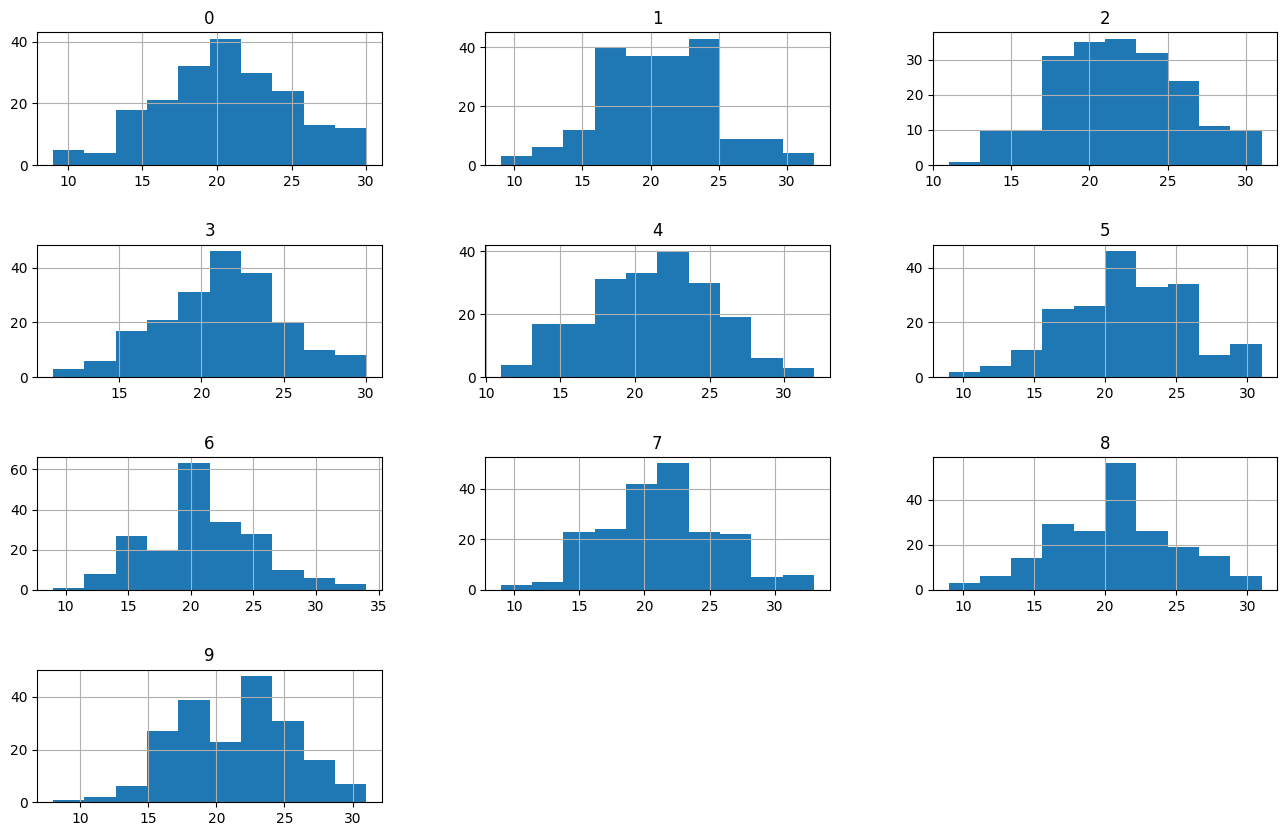

In [29]:
# количество выборок
samples_count = 10
# размер выборки
sample_size = 200
samples = pd.DataFrame([
    [np.random.choice(sp) for _ in range(sample_size)] for _ in range(samples_count)
]).T

samples.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)

In [30]:
means = samples.mean()
print('Сравним среднию ГС и среднию средних выборок', sp.mean(), means.mean())
print('Разница средних:', abs(means.mean() - sp.mean()), ', Стандартная ошибка среднего:', means.std())

Сравним среднию ГС и среднию средних выборок 20.9969 21.031000000000002
Разница средних: 0.03410000000000224 , Стандартная ошибка среднего: 0.36088471535627237


Берем произвольную выборку:

In [32]:
import math

sample = samples[0]
print('sample mean:', sample.mean())
print('sample SE: ', sample.std()/math.sqrt(sample.size))

sample mean: 20.495
sample SE:  0.2981515499434278


Пример

**Рассчитайте стандартную ошибку среднего, если выборочное среднее равняется 10, дисперсия 4, при N = 100.**

In [36]:
M = 10
D = 4
N = 100

sd = sqrt(D)
print('SE равен', sd/sqrt(N))

SE равен 0.2


### Доверительные интервалы среднего

Расчет 1.96σ:

In [33]:
p = 0.95
# так как у нас двухсторонний интервал, сделаем вычисление
alpha = (1-p)/2
# isf - Inverse survival function (inverse of sf) 
print(f'{stats.norm().isf(alpha):.2f} sigma')

1.96 sigma


Пример:

**Рассчитайте 99% доверительный интервал** для следующего примера: 
среднее = 10, стандартное отклонение = 5, размер выборки = 100

In [35]:
from math import sqrt

p = 0.99
mean = 10
std = 5
n = 100

se = std/sqrt(n)
alpha = (1-p)/2
sigma = stats.norm().isf(alpha)
сonfidence_interval = mean - sigma*se, mean + sigma*se
print('[%.2f; %.2f]' % сonfidence_interval)

[8.71; 11.29]


Использование доверительных интервалов зачастую рассматривают, как альтернативный способ проверки гипотез. В нашем случае, если значение 20 (предполагаемое среднее значение в генеральной совокупности) не будет принадлежать 95% доверительному интервалу, рассчитанному по выборочным данным, у нас будет достаточно оснований отклонить нулевую гипотезу. 

**Проверьте согласуются ли результаты двух этих подходов: рассчитайте 95% доверительный интервал для среднего значения, на примере с тестированием нового препарата.**

n = 64,  sd = 4,   M = 18.5

In [37]:
std = 4
n = 64
mean = 18.5

left = mean - 1.96 * (std / n ** 0.5)
right = mean + 1.96 * (std / n ** 0.5)
print([left, right])



[17.52, 19.48]


Так как 20 у нас не принадлежит доверительному интервалу, то мы отклоняем нулевую гипотезу.

Задача:

В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. 
**Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.**

In [43]:
sd = 9
n = 144
mean = 118
M = 115

se = sd/sqrt(n)
z_scores = (mean-M)/se
print('z=', z_scores)

p_values = stats.norm.sf(abs(z_scores)) #one-sided
p_values2 = stats.norm.sf(abs(z_scores))*2 #two-sided
print("%.20f" % p_values)
print("%.20f" % p_values2)

z= 4.0
0.00003167124183311986
0.00006334248366623973


# Часть 2

## T-распределение (Распределение Стьюдента)

График снизу показывает, как меняется форма распределения при увеличение количества степеней свободы.
А также показывает приближение t-распредееления к нормальному по мере увеличения степеней свободы.

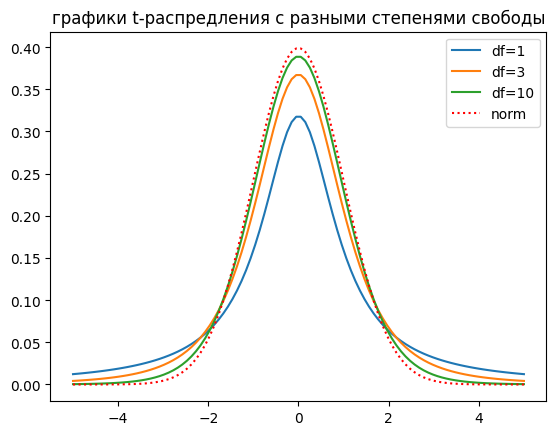

In [45]:
from scipy.stats import t, norm

x = np.linspace(-5, 5, 100)
y1, y2, y3 = t.pdf(x, df=1), t.pdf(x, df=3), t.pdf(x, df=10)
y4 = norm.pdf(x)

plt.title('графики t-распредления с разными степенями свободы')
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.plot(x, y4, 'r:')
plt.legend(('df=1', 'df=3', 'df=10', 'norm'))
plt.show()

Решение задачи:

**На выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: μ=10 и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости (двусторонний) равен:**

In [46]:
t = -2
n = 15
df = n - 1

p = 2 * stats.t.sf(abs(t), df)
print(f'p = {p:.3f}')

p = 0.065


## Сравнение двух средних

Пример реализации: 

In [50]:
from scipy.stats import t, norm

array1 = np.array([84.7, 105.0, 98.9, 97.9, 108.7, 81.3, 99.4, 89.4, 93.0,
                   119.3, 99.2, 99.4, 97.1, 112.4, 99.8, 94.7, 114.0, 95.1, 115.5, 111.5])
array2 = np.array([57.2, 68.6, 104.4, 95.1, 89.9, 70.8, 83.5, 60.1, 75.7,
                   102.0, 69.0, 79.6, 68.9, 98.6, 76.0, 74.8, 56.0, 55.6, 69.4, 59.5])

# считаем количество элементов, среднее, стандартное отклонение и стандартную ошибку
df = pd.DataFrame({'Выборка_1':array1, 'Выборка_2':array2}).agg(['mean','std','count','sem']).transpose()
df.columns = ['Mx','SD','N','SE']

# рассчитываем 95% интервал отклонения среднего
p = 0.95
K = t.ppf((1 + p)/2, df['Mx']-1)
df['Интервал'] = K * df['SE']

df

,Mx,SD,N,SE,Интервал
Выборка_1,100.815,10.246503,20.0,2.291188,4.545754
Выборка_2,75.735,15.458102,20.0,3.456537,6.886174


Строим графики для наглядного представления данных, boxplot из изначальных array1, array2, доверительные интервалы из датафрейма df.

C:\Users\admin\AppData\Local\Temp\ipykernel_4216\1268559234.py:10: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['Интервал'],\


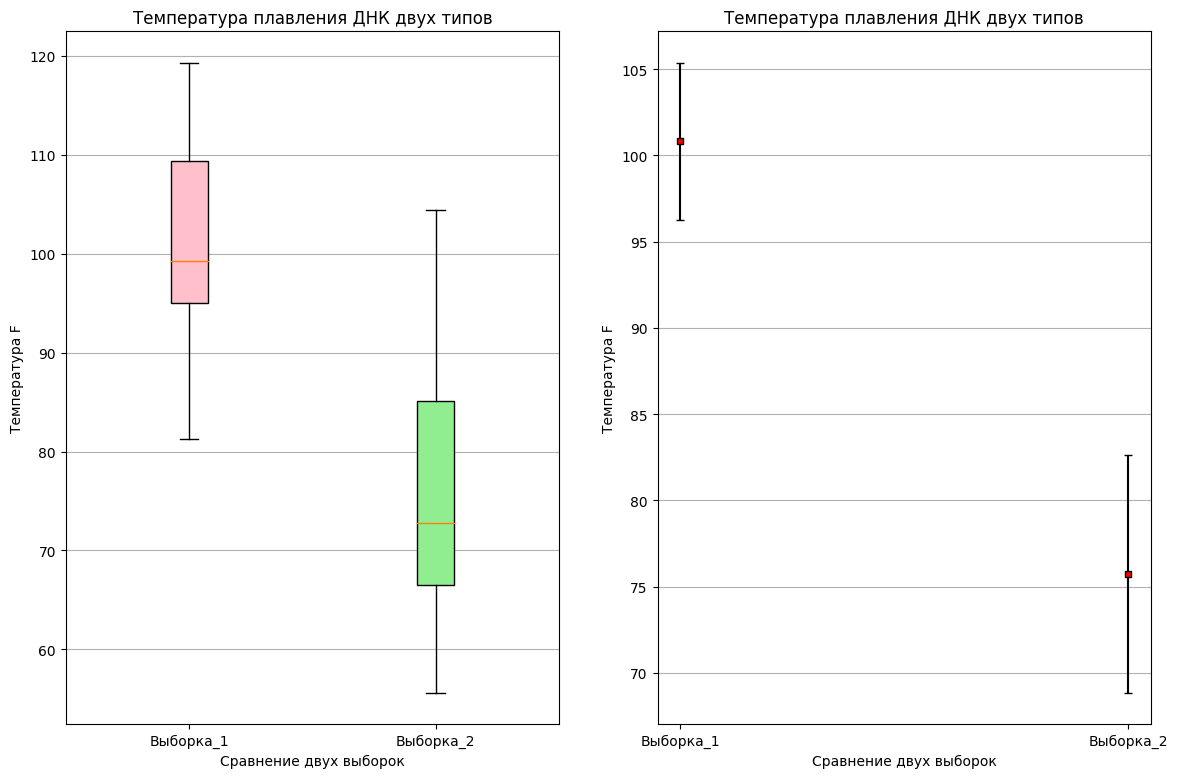

In [53]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(14, 9))

# график boxplot
bplot1 = ax1.boxplot([array1, array2],
                     vert=True,  # создаем вертикальные боксы
                     patch_artist=True, # для красоты заполним цветом боксы квантилей
                     labels=['Выборка_1', 'Выборка_2']) # используется для задания значений выборок в случае с boxplot

# график доверительных интервалов
bplot2 = ax2.errorbar(x=df.index, y=df['Mx'], yerr=df['Интервал'],\
                      color="black", capsize=3, marker="s", markersize=4, mfc="red", mec="black", fmt ='o')

# раскрасим boxplot  
colors = ['pink', 'lightgreen']
for patch, color in zip(bplot1['boxes'], colors):
    patch.set_facecolor(color)
    
# добавим общие для каждого из графиков данные
for ax in [ax1, ax2]:
    ax.yaxis.grid(True)
    ax.set_title('Температура плавления ДНК двух типов')
    ax.set_xlabel('Сравнение двух выборок')
    ax.set_ylabel('Температура F')
    
plt.show()

По данным графикам мы можем сказать, что средние значения выборок сильно отличаются, так как среднее значение второй выборки не входит в доверительный интервал первой выборки, так же можно сказать, что в обоих выборках нет сильных выбросов значений.

Задача 1:

**Рассчитайте доверительный интервал основываясь на знании t - распределения для среднего значения температуры плавления ДНК у первого вида:**

X=89,9 sd=11,3 n=20

In [54]:
mean = 89.9
sd = 11.3
n = 20
# степень свободы
df = n - 1
# 95% доверительный интервал
p = 0.95
alpha = 1-p
# стандартная ошибка
se = sd/sqrt(n)

# ppf - Percent point function
# делим на два, так как по умолчанию функция считает для одного конца, а нам надо для двух
t_value = stats.t(df).ppf(1-(alpha/2))

# доверительный интервал 
сonfidence_interval = (mean-t_value*se, mean+t_value*se)
print('[%.2f; %.2f]' % сonfidence_interval)

[84.61; 95.19]


Задача 2:

**Первые премии Оскар за лучшую мужскую и женскую роль были вручены в 1929. Данные гистограммы демонстрируют распределение возраста победителей с 1929 по 2014 год (100 мужчин, 100 женщин). Используя t - критерий проверьте, можно ли считать наблюдаемые различия в возрасте между лучшими актрисами и актерами статистически достоверными.**

Средний возраст мужчин равен 45, sd = 9.

Средний возраст женщин равен 34, sd = 10.

In [56]:
mean_m, mean_f = 45, 34
sd_m, sd_f = 9, 10
N = 100

se = sqrt((sd_m ** 2)/N + (sd_f ** 2)/N)
t_value = (mean_m - mean_f)/se

p = t.sf(t_value, N-2)

print(f'p = {p}')

if p >= 0.05:
    print('Мы НЕ можем отклонить нулевую гипотезу')
else:
    print('Мы можем отклонить нулевую гипотезу')

p = 5.328933875539173e-13
Мы можем отклонить нулевую гипотезу


Нулевая гипотеза в данной задаче - что средние в генеральной совокупности равны (их разница будет равняться 0).

## Проверка распеределения на нормальность

### QQ-plot

Показывает на сколько наши выборочные значения хорошо соответствуют предсказанным значениям, то есть значениям которые были бы будь наше распределение идеально номальным.
Применяется когда в выборке мало наблюдений.

Пример реализации:

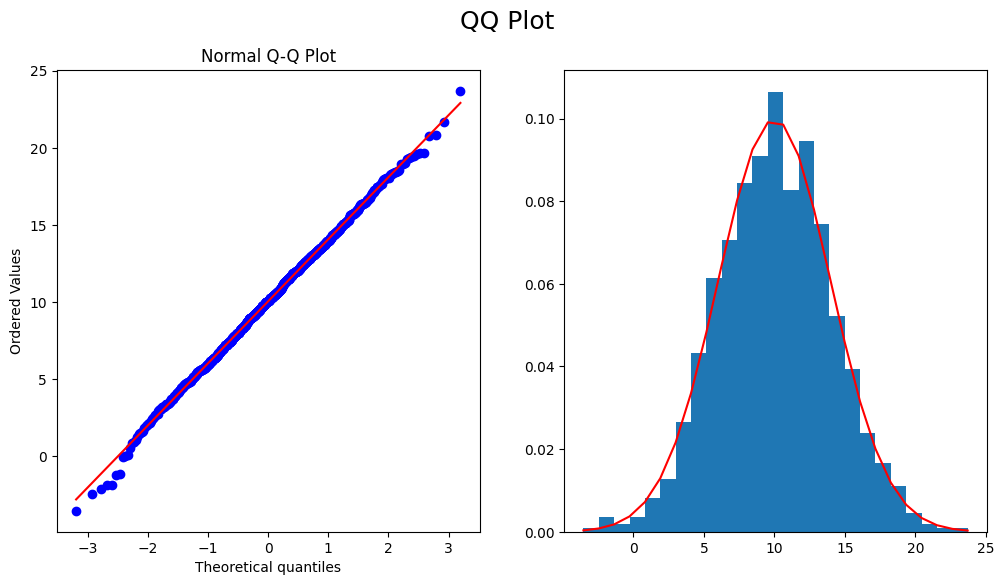

In [57]:
plt.rcParams['figure.figsize'] = [12, 6]

mu, sigma = 10, 4
n = 1000 # с ростом числа точек в распределении qq-plot стремится к прямой
sequence = np.random.normal(mu, sigma, n)


fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('QQ Plot', fontsize=18)

# Q-Q Plot graph
stats.probplot(sequence, dist="norm", plot=ax1)
ax1.set_title("Normal Q-Q Plot")

# normal distribution histogram + distribution
count, bins, _ = ax2.hist(sequence, 25, density=True)
p_x = 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu)**2 / (2 * sigma**2) )
ax2.plot(bins, p_x, color='r')
 

plt.show()

### Однофакторный дисперсионный анализ

Задача из курса с генотерапией решена отдельно файлы:  
 - genetherapy.csv - исходный набор данных
 - One-way_ANOVA.py - реализация программы с графиками, созданием датафрейма и расчетами с помощью библиотеки spicy.
 - BoxPlot.pdf - график Boxplot, сохраненный в формате pdf.

Пример реализации однофакторного анализа (задача из видео):


Нулевая гипотеза: a=b=c
Альтернативная гипотеза: !(a=b=c)
Результат:
отклоняем нулевую гипотезу


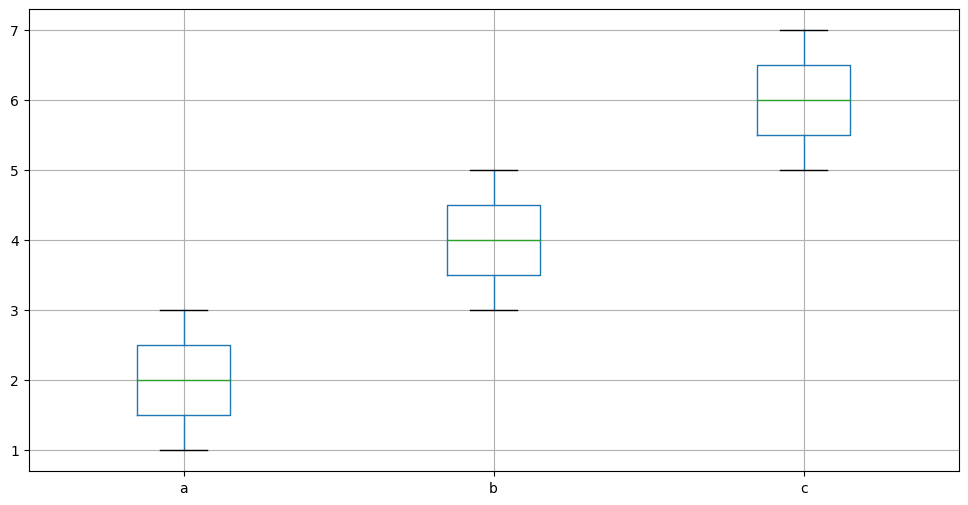

In [60]:
# Выборки которые надо сравнить
data = pd.DataFrame({
           'a': [3, 1, 2],
           'b': [5, 3, 4],
           'c': [7, 6, 5]
          })
data.boxplot()
print('Нулевая гипотеза:', '='.join(data))
print('Альтернативная гипотеза:', f'!({"=".join(data)})')
# общая средняя
grand_mean = data.values.flatten().mean()
# отклонение групповых средний от общей средней
ssb = sum(data[group].size * (group_mean - grand_mean)**2  for group, group_mean in data.mean().items())
# отклонения значений в внутри группы от средней группы
ssw = sum(sum((x - group_mean)**2 for x in data[group]) for group, group_mean in data.mean().items())

groups = data.shape[1]
dfb = groups - 1
dfw = data.size - groups
# межгрупповой средний квадрат  
mssb = ssb/dfb
# внутригрупповой средний квадрат
mssw = ssw/dfw

f_value = mssb/mssw

p = stats.f.sf(f_value, dfb, dfw)
print('Результат:')
if p < 0.05:
    print('отклоняем нулевую гипотезу')
else:
    print('НЕ отклоняем нулевую гипотезу')

### Множественные сравнения
или почему мы не можем применить t-критерий для более двух выборок

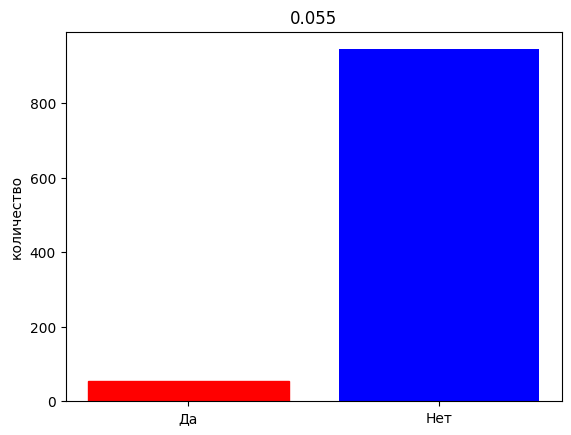

In [2]:
import scipy.stats as stats
from matplotlib import pyplot
import itertools
import numpy as np

def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()
    

false_alarm(2,30,0.05)

Что мы можем вынести из этого графика: так как мы многократно брали выборки из n элементов и сравнивали средние этих выборок между собой и повторяем эту иттерацию 1000 раз, получаем данный график.

На графике показано в каком проценте случаев мы получили статестически значимые различия p<0.5 (первый столбик), то есть в 5.5% мы получили совершенно случайно значимые различия, хотя извлекали выборки из одной ГС.

**Если многократно увеличить количество групп, которые участвуют в нашем исследовании и сравнивать их между собой, то вероятность получить хотя бы одно значимое различие, которого на самом деле вообще не существует, увеличивается**

Для устранения этой проблемы необходимо проводить **поправку на множественность** самая популярная - **Поправка Бонферрони**

Все тоже что и выше, только с поправкой Бонферрони - вместо чистой вероятности 0.5 деленное (число выборок/(число выборок -1)/2):

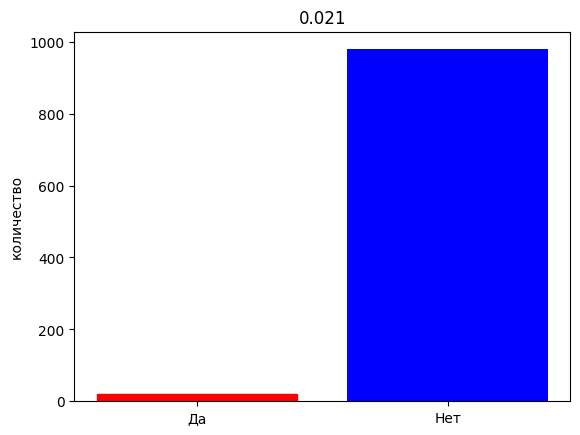

In [3]:
def ttest(a , b):
    se = np.sqrt( a['SD']**2/a['N'] + b['SD']**2/b['N']  )
    t = (a['Mx'] - b['Mx'])/se
    dfreedom = a['N'] + b['N'] - 2
    return stats.t.sf(np.abs(t), dfreedom)*2

# n - элементов в выборке
# m - количество выборок
# a -  вероятность
def false_alarm(m, n, a):
    trys = 1000 # количество экспериментов
    hist = {'Да':0, 'Нет':0} # результаты сравнений     
    data = list(range(m)) # инициализация групп с выборками
    
    # запускаем trys экспериментов
    for i in range(trys):
        
        # наполняем m выборок, для ускорения сразу их агрегируем по SD, Mx, N
        for j in range(m):
            dt = stats.norm.rvs(loc=M, scale=D, size=n)
            data[j] = {'SD':np.std(dt, ddof = 1), 'Mx':np.mean(dt), 'N':n}
        
        #сравниваем выборки по 2 группы, перебор можно реализовать с помощью двух циклов или воспользоваться itertools
        for first, second in itertools.combinations(data, 2):
            if ttest(first, second) <= a:
                hist['Да']+=1
                break
        else:
            hist['Нет']+=1

    # рисуем гитограмму частот
    barlist = pyplot.bar(hist.keys(), hist.values(), color='b')
    barlist[0].set_color('r')
    pyplot.title(round(hist['Да'] / trys,3))
    pyplot.ylabel('количество')
    pyplot.show()
    

false_alarm(2, 30, 0.5/((8*7)/2))

Можно сразу заметить что количество случайных ошибок первого рода уменьшилась.

Но эта поправка уменьшает p-уровень значимости, а значит уничтожает значимые результаты.

## Поправка критерий Тьюки


In [7]:
from scipy import stats
import itertools
import math
import pandas as pd
import numpy as np
from scipy.stats import studentized_range

data = pd.read_csv('C:/Users/admin/Documents/GitHub/Stepic_статистика/Основы статистики/genetherapy.csv')

def ssdev( xs ):
    mu = xs.mean() 
    square_deviation = lambda x : (x - mu) ** 2 
    return sum( map(square_deviation, xs) )


SSW = sum(data.groupby('Therapy').apply(lambda g: ssdev(np.array(g)))) 
# Out: 1302.2666666666669

dfSSW = len(data.expr) - len(data.Therapy.unique()) # Out: 56
MSw = SSW/dfSSW # Out: 186.90555556
SE = math.sqrt(MSw/15) #Out: 1.2451174509525864

combinations = list(itertools.combinations(data.Therapy.unique(), 2))
#Out: [('A', 'B'), ('A', 'C'), ('A', 'D'), ('B', 'C'), ('B', 'D'), ('C', 'D')]

n_group = len(data.Therapy.unique()) #Out: 4
dfSSW = len(data.expr) - len(data.Therapy.unique()) #Out:56


alpha = 0.05
q_crit = studentized_range.ppf(1-alpha, n_group, dfSSW) # Out: 3.7446781868177195

df = pd.DataFrame(columns=[f'{first} - {second}' for first, second in combinations], 
                 index=['q','meandiff','p-adj','lower','upper'])

means = data.groupby('Therapy').mean().T

for first, second in combinations:
    key = f'{first} - {second}'
    first_second_mean = [means[first].expr, means[second].expr]
    _q = (max(first_second_mean) - min(first_second_mean))/SE
    _meandiff = (means[second].expr - means[first].expr)
    df[key]['q'] = _q
    df[key]['meandiff'] = _meandiff
    df[key]['p-adj'] = 1-studentized_range.cdf(_q, n_group, dfSSW)
    df[key]['upper'] = _meandiff+ q_crit*SE
    df[key]['lower'] = _meandiff- q_crit*SE

df.T

C:\Users\admin\AppData\Local\Temp\ipykernel_13364\1782559.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  SE = math.sqrt(MSw/15) #Out: 1.2451174509525864


,q,meandiff,p-adj,lower,upper
A - B,0.749595,-0.933333,0.95142,-5.595897,3.729231
A - C,4.283398,-5.333333,0.018886,-9.995897,-0.670769
A - D,5.943214,-7.4,0.000542,-12.062564,-2.737436
B - C,3.533803,-4.4,0.071041,-9.062564,0.262564
B - D,5.19362,-6.466667,0.002944,-11.129231,-1.804103
C - D,1.659817,-2.066667,0.645794,-6.729231,2.595897


## Многофакторный анализ

### Двухфакторный дисперсионный анализ

         expr  age dose
0  107.351478    1   D1
1  104.504438    1   D1
2  103.435134    1   D1
3  109.572882    1   D1
4  114.993803    1   D1
             expr        age
count   64.000000  64.000000
mean   103.395691   1.500000
std      5.353458   0.503953
min     90.918788   1.000000
25%    100.500687   1.000000
50%    103.696660   1.500000
75%    106.845715   2.000000
max    114.993803   2.000000


,df,sum_sq,mean_sq,F,PR(>F)
dose,1.0,16.912241,16.912241,0.648351,0.423830
age,1.0,197.452754,197.452754,7.569592,0.007804
Residual,61.0,1591.184501,26.084992,NaN,NaN


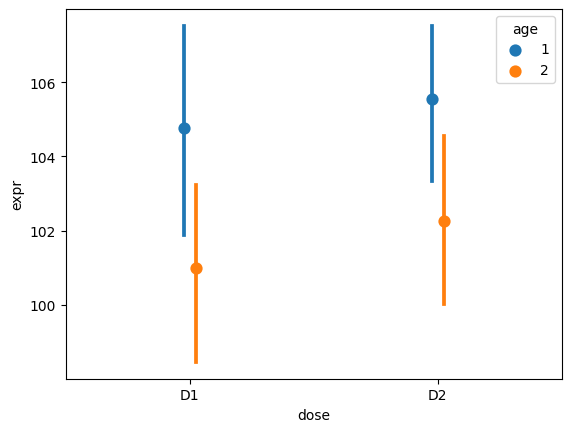

In [12]:
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib.backends.backend_pdf import PdfPages
from statsmodels.formula.api import ols

df = pd.read_csv('atherosclerosis.csv')

print(df.head())
print(df.describe())

sns.pointplot(x=df.dose, y=df.expr, hue=df.age, data=df, dodge=True, linestyles=['', ''])

moda = ols('expr ~ age+dose',data=df).fit()
anova_table = sm.stats.anova_lm(moda, type=2)

anova_table

По таблице дисперсионного анализа можно сделать вывод:
 - Значимый эффект для факторов возраста пациентов с инсультом(F(1, 61) = 7.56959, р < 0,05)
 - Незначимый эффкут для факторов дозировки (F(1, 61) = 0.648, p > 0.05) 

**Взаимодействие факторов в дисперсионном анализе**

        var4  hormone  sex
0  17.859039        1    1
1  20.842343        1    1
2  19.318099        1    1
3  20.064451        1    1
4  17.620316        1    1
            var4    hormone        sex
count  64.000000  64.000000  64.000000
mean   18.633031   0.500000   0.500000
std     3.280779   0.503953   0.503953
min    12.452679   0.000000   0.000000
25%    16.148186   0.000000   0.000000
50%    18.556577   0.500000   0.500000
75%    20.539017   1.000000   1.000000
max    28.619523   1.000000   1.000000


,df,sum_sq,mean_sq,F,PR(>F)
sex,1.0,0.119762,0.119762,0.012228,0.912318
hormone,1.0,0.847472,0.847472,0.086528,0.769653
hormone:sex,1.0,89.483384,89.483384,9.136390,0.003682
Residual,60.0,587.650394,9.794173,NaN,NaN


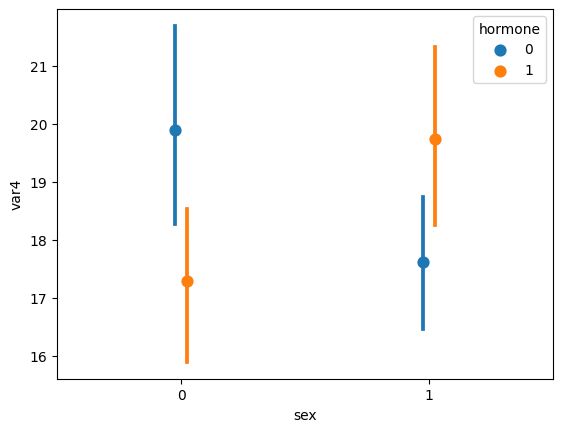

In [17]:
df = pd.read_csv('birds.csv')

print(df.head())
print(df.describe())

sns.pointplot(x=df.sex, y=df.var4, hue=df.hormone, data=df, dodge=True, linestyles=['', ''])

moda = ols('var4 ~ sex+hormone+hormone:sex',data=df).fit()
anova_table = sm.stats.anova_lm(moda, type=2)

anova_table

Переменные инъекция гормона и пол - независимые, а переменная значение - зависимая.

По данным таблицы дисперсионного анализа видно, что по отдельности эти две независимые переменные не оказали значимого влияния на нашу зависимую переменную(изменчивость(mean_sq в таблице), которая обуславливается этими факторами не велика), но взаимодействие этих факторов значимо для нашей зависимой переменной.

*Как это возможно?*

Построим график результатов исследования:

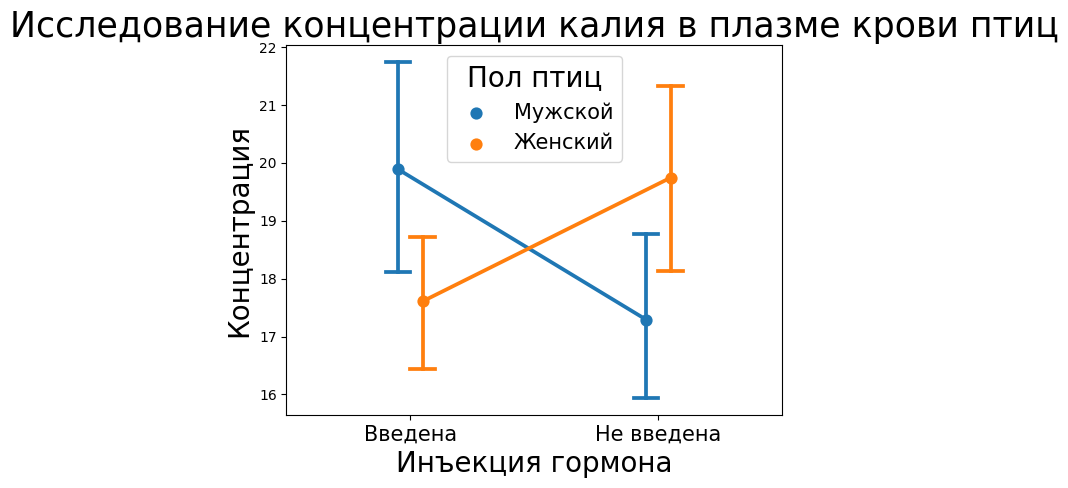

In [21]:
import matplotlib.pyplot as plt
import numpy as np

pplot = sns.pointplot(x='hormone', y='var4', hue='sex', dodge=0.1, capsize=.1, data=df)


# меняем названия титула, оси х и оси у

plt.title('Исследование концентрации калия в плазме крови птиц', fontsize=25)
plt.xlabel('Инъекция гормона', fontsize=20)
plt.ylabel('Концентрация', fontsize=20)


# меняем названия отложенных по оси х значений

bars = ('Введена', 'Не введена')
x_pos = np.arange(len(bars))
plt.xticks(x_pos, bars, fontsize=15)

# меняем "Легенду" та, что в верхнем правом углу

leg_handles = pplot.get_legend_handles_labels()[0]
pplot.legend(leg_handles, ['Мужской', 'Женский'], title='Пол птиц', title_fontsize=20, fontsize=15)

Незначимый эффект для фактора пола (F(1, 60) = 0.09, p > 0.05)

Незначимый эффект для фактора введения инъекции гормона (F(1, 60) = 0.01, p > 0.05)

Значимое взаимодействие факторов пола и инъекции (F(1, 60) = 9.1, p < 0.05)

Многофакторный дисперсионный анализ не ограничевает нас в выборе количества факторов для разбора, но он редко встречается при более 3х факторах, тк сложно представить взаимодействие 4х и более факторов на графике. 

**Требования к данным при многофакторном дисперсионном анализе**

- Нормальность распреления данных (строим графики qqplot и если данные лежат примерно на линии средних значений, то распределения нормальные)
- Гомогенность дисперсий, т.е. все дисперсии в группах наблюдений должны быть примерно равны - проверять на гомогенность тестом Ливина

<Axes: >

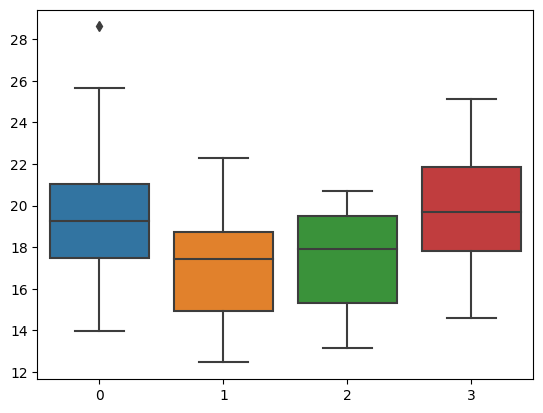

In [57]:
import scipy.stats as sm
from scipy.stats import shapiro, probplot
import pylab

x1 = df[(df["sex"] == 0) & (df["hormone"] == 0)]["var4"].values
x2 = df[(df["sex"] == 0) & (df["hormone"] == 1)]["var4"].values
x3 = df[(df["sex"] == 1) & (df["hormone"] == 0)]["var4"].values
x4 = df[(df["sex"] == 1) & (df["hormone"] == 1)]["var4"].values

sns.boxplot([x1, x2, x3, x4])

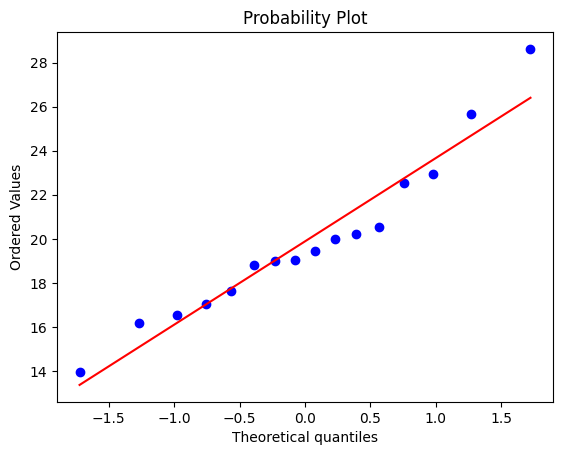

ShapiroResult(statistic=0.94510418176651, pvalue=0.4162890613079071)


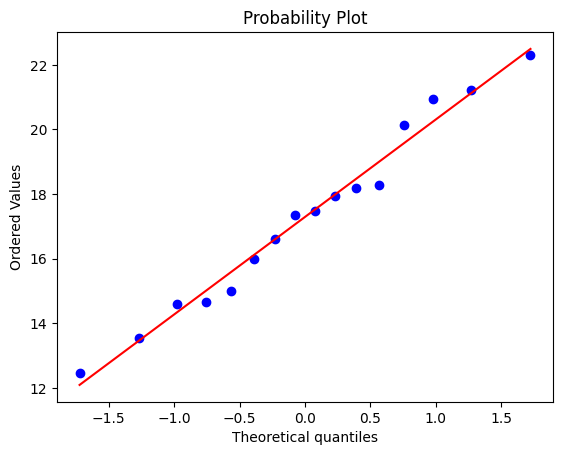

ShapiroResult(statistic=0.9721516370773315, pvalue=0.8721426129341125)


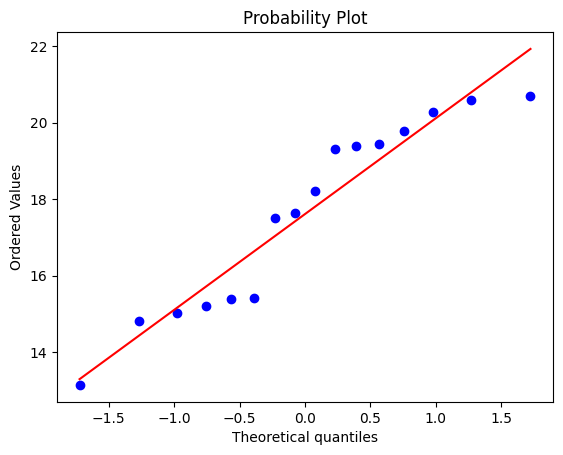

ShapiroResult(statistic=0.9067473411560059, pvalue=0.10314302891492844)


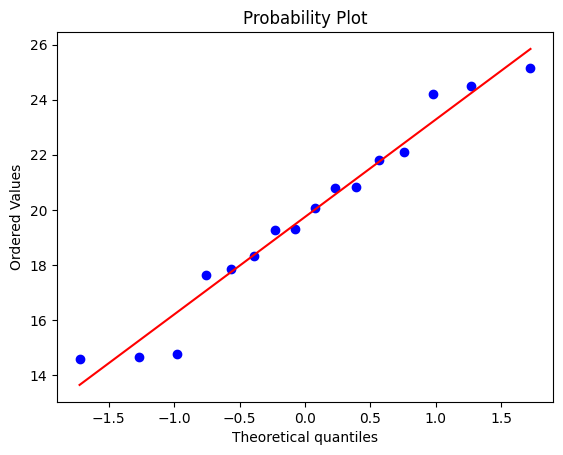

ShapiroResult(statistic=0.94819176197052, pvalue=0.4615950882434845)


In [58]:
for i in [x1, x2, x3, x4]:
    probplot(i, dist="norm", plot=pylab)
    pylab.show()
    print(shapiro(i))

# Корреляция и регрессия

## Корреляция и ковариация

Пример рассчета для рандомно сгенерированных значений:

In [1]:
import numpy as np
import random as r

def cov(x, y):
    assert x.size == y.size
    return ((x - x.mean()) * (y - y.mean())).sum()/(x.size - 1)

def cor(x, y):
    return cov(x, y)/(np.std(x, ddof=1)*np.std(y, ddof=1))

# функция имитирущая случаные факторы
# р - настолько существенным будет случайный фактор
def randomize(arr, p):
    alpha = np.max(arr) - np.min(arr)
    res = np.zeros(arr.shape)
    for i, v in enumerate(arr):
        sign = 1 if r.choice([True, False]) else -1
        res[i] = v + sign*alpha*r.random()*p
    return res

x = np.array(range(30))
y = randomize(x, 0.1)
y1 = randomize(x, 0.5)
y2 = randomize(x, 1)

Для визуализации взаимосвязи переменных необходимо импользовать диаграмму рассеивания.

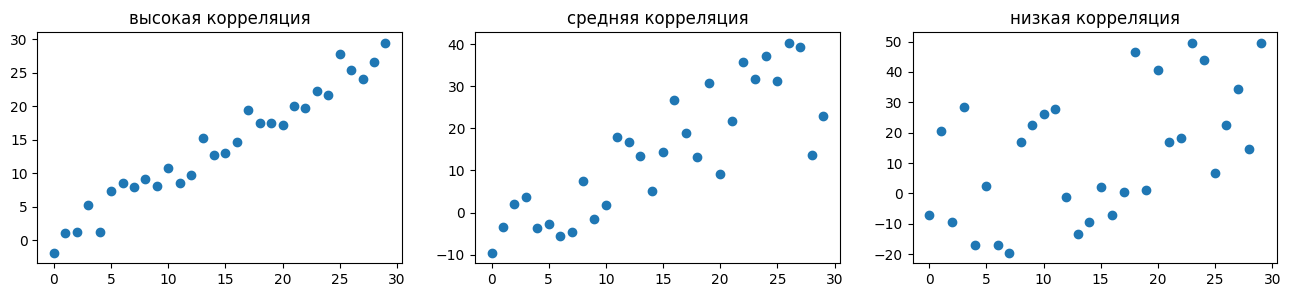

In [2]:
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 3))
ax1.scatter(x, y)
ax2.scatter(x, y1)
ax3.scatter(x, y2)
ax1.set_title('высокая корреляция')
ax2.set_title('средняя корреляция')
ax3.set_title('низкая корреляция')
plt.show()

In [8]:
print(f'''cov1: {cov(x, y):.2f}                cov2: {cov(x, y1):.2f}                       cov3: {cov(x, y2):.2f}
cor1: {cor(x, y):.2f}                 cor2: {cor(x, y1):.2f}                         cor3: {cor(x, y2):.2f}
''')

cov1: 73.90                cov2: 111.76                       cov3: 96.16
cor1: 0.98                 cor2: 0.85                         cor3: 0.51



Решение задачи:

,X,Y
X,1.0,-1.0
Y,-1.0,1.0


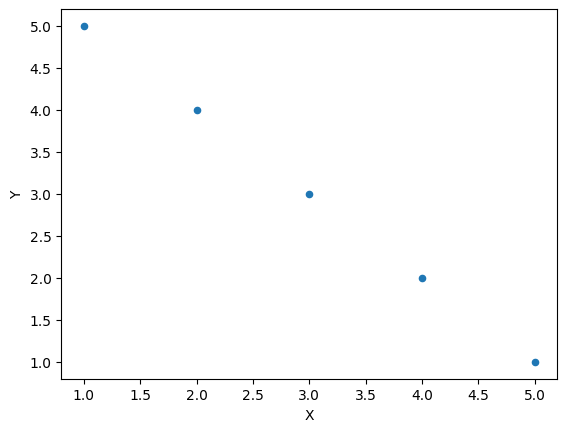

In [21]:
import pandas as pd 

df = pd.DataFrame({'X': [4, 5, 2, 3, 1], 'Y':[2, 1, 4, 3, 5]})
df.plot.scatter('X', 'Y')
df.corr()

# Методы регрессионного анализа
## Регрессия с одной независимой переменной
Демонстрация метода наименьших квадратов: 

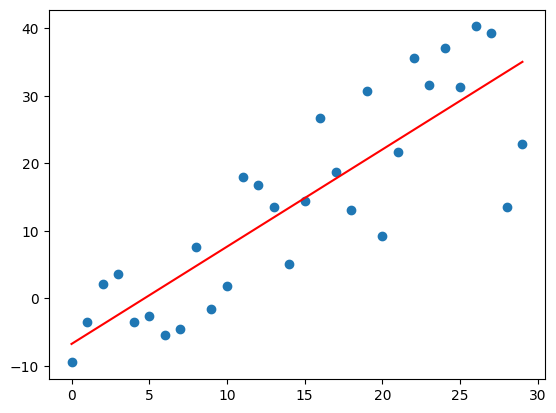

In [22]:
b1 = y1.std()/x.std()*cor(x, y1)
b0 = y1.mean() - b1*x.mean()
f = lambda x: b0 + b1*x
y_pred = f(x)
plt.scatter(x, y1)
plt.plot(x, y_pred, color='r')
plt.show()

На графике изображена зависимость двух количественных переменных X и Y. Рассчитайте коэффициент b1 для регрессионной прямой, если коэффициент детерминации равен 0,25:

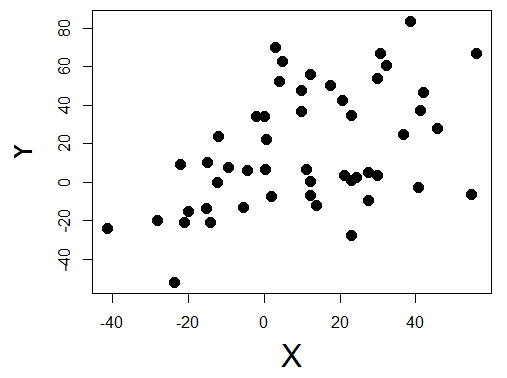

In [25]:
Mx = 15 # Среднее и дисперсия для х
Dx = 25

My = 10 # Среднее и дисперсия для у
Dy = 36

R2 = 0.25 # коэффициент детерминации

rxy = R2**0.5 # коэффициент корреляции Пирсона - квадрат коэффициента детерминации

sdx = Dx**0.5 # среднее квадратическое  отклонение для х и у
sdy = Dy**0.5 

# расчеты параметров линейной регрессии
b1 = sdy/sdx * rxy
b0 = My-b1*Mx

print('Уравнение линейной регрессии у='+str(b0)+'+'+str(b1)+'x')

0.5 5.0 6.0
Уравнение линейной регрессии у=1.0+0.6x


## Применение регрессионного анализа и интерпритация результатов

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('states.csv')
df.head()

,state,metro_res,white,hs_grad,poverty,female_house
0,Alabama,55.4,71.3,79.9,14.6,14.2
1,Alaska,65.6,70.8,90.6,8.3,10.8
2,Arizona,88.2,87.7,83.8,13.3,11.1
3,Arkansas,52.5,81.0,80.9,18.0,12.1
4,California,94.4,77.5,81.1,12.8,12.6


Есть данные по штатам с различными значениями:

**metro_res** - процент населения живущие в столице

**white** - процент белого населения

**hs_grad** - процент людей со образованием

**poverty** - уровень бедности

**female_house** - процент домов, где есть домохозяйки

Исследуем связь уровня образования и бедности, где бедность будет ЗП, а уровень образования НП.

Первое, что нам необходимо сделать, это построить линейную модель, которая наилучшим образом будет описывать наши данные.

y=b0+b1x

Далее, построив нашу модель, нам надо узнать, насколько хорошо наша объясняет ЗП, для этого найдём коэфицент детерминации R2

Проверим нулевую гипотезу:

b1=0:H0

Третья наша задача, это задача предсказания, по данным НП мы хотим предсказать ЗП.

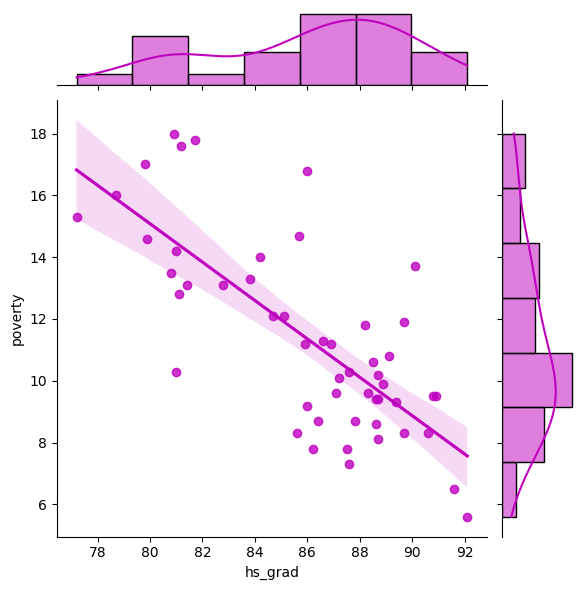

In [28]:
sns.jointplot(x='hs_grad', y='poverty', data=df, kind='reg', color='m')

In [29]:
df.describe()

,metro_res,white,hs_grad,poverty,female_house
count,51.000000,51.000000,51.000000,51.000000,51.000000
mean,72.249020,81.719608,86.011765,11.349020,11.633333
std,15.275894,13.897223,3.725998,3.099185,2.356155
min,38.200000,25.900000,77.200000,5.600000,7.800000
25%,60.800000,76.800000,83.300000,9.250000,9.550000
50%,71.600000,85.400000,86.900000,10.600000,11.800000
75%,86.800000,90.250000,88.700000,13.400000,12.650000
max,100.000000,97.100000,92.100000,18.000000,18.900000


Строим регрессионную модель:

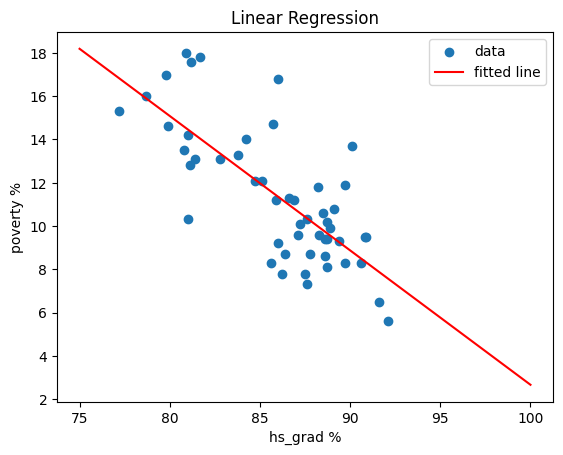

In [30]:
from scipy.stats import linregress

slope, intercept, r, p, std_err =  linregress(df['hs_grad'], df['poverty'])

x = np.linspace(75, 100)

reg = lambda x: intercept + slope*x
plt.scatter(x='hs_grad', y='poverty', data=df, label='data')
plt.xlabel('hs_grad %')
plt.ylabel('poverty %')
plt.title('Linear Regression')
plt.plot(x, reg(x), color='r', label='fitted line')
plt.legend()
plt.show()

In [31]:
print(f'''
slope = {slope:.2f}
intercept = {intercept:.2f}
r = {r:.2f}
r squared = {(r ** 2):.2f}
p = {p:.5f}
std_err = {std_err:.3f}
''')


slope = -0.62
intercept = 64.78
r = -0.75
r squared = 0.56
p = 0.00000
std_err = 0.079

